In [ ]:
import pandas as pd

# Try reading the CSV file with a different encoding
df = pd.read_csv(r"C:\Users\Prashant Ronad\Documents\HealthCare\Files\PMC-Patients.csv", encoding='ISO-8859-1')

# Extract the 6th column values into a list
l = df.iloc[:, 5].tolist()

# Print the third value to verify
print(l[2])

# Initialize an empty list to store matching values
lis1 = []
lis2 = []
lis = []
pred_1 = []
pred_2 = []
c1 = 0
c2 = 0
for i in range(len(l)):
    value = str(l[i])  # Convert to string to handle NaN or other non-string values
    if 'MRI' in value and 'brain' in value and c1 < 2500:
        lis1.append(value)
        c1 += 1
        pred_1.append(1)
    else:
        if c2 < 3000:
            lis2.append(value)
            c2 += 1
            pred_2.append(0)

lis1.extend(lis2)
pred_1.extend(pred_2)
print(lis)

In [77]:
import pandas as pd

# Try reading the CSV file with a different encoding
df = pd.read_csv(r"C:\Users\Prashant Ronad\Documents\HealthCare\Files\PMC-Patients.csv", encoding='ISO-8859-1')

# Extract the 6th column values into a list
l = df.iloc[:, 5].tolist()

# Print the third value to verify
print(l[2])

# Initialize an empty list to store matching values
lis = []

c = 0
for i in range(len(l)):
    value = str(l[i])  # Convert to string to handle NaN or other non-string values
    if 'MRI' in value and 'brain' in value and c < 4:
        lis.append(value)
        c += 1


print(lis)


C:\Users\Prashant Ronad\AppData\Local\Temp\ipykernel_12784\3411076121.py:4: DtypeWarning: Columns (0,2,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256

One week after a positive COVID-19 result this 57-year-old male was admitted to the ICU because of oxygen desaturation (70%) with worsening tachypnea and dyspnea. Physical therapy started immediately after ICU admission. We found a highly dyspneic patient with a high breathing frequency and significant symptom exacerbation from the slightest effort. With hands-on physical therapy guidance, the patient managed to achieve a 135? prone position and to perform deep-breathing exercises resulting in an increase in oxygen saturation from 88% to 96%. Intensive physical therapy and positioning was continued along with 6 to 12 L/min of oxygen therapy over the next days and intubation was avoided. The major challenges in achieving a prone position were the patient? profoundly reduced respiratory capacity and the high risk of exacerbating his symptoms. However, standard ICU monitoring enabled safe implementation at an individually adapted pace to allow sufficient time for convalescence. After 3 da

In [78]:
import re


tsl = []

dataset = lis
final_list_of_sentences = []

for text in dataset:
    # Split the text into sentences
    sentences = re.split(r'\.\s*', text)
    # Ensure sentences are non-empty and add a full stop back
    sentences = [sentence + '.' for sentence in sentences if sentence]

    # Tokenize each sentence into words and join them back into a single string
    tokenized_sentences = []
    for sentence in sentences:
        tokens = re.findall(r'\b[\w-]+\b', sentence.lower())
        tokenized_sentence = ' '.join(tokens)
        tokenized_sentences.append(tokenized_sentence)

    # Append the tokenized sentences to the final list
    final_list_of_sentences.append(tokenized_sentences)

print(final_list_of_sentences)


[['a 24-year-old healthy woman presented with difficulty breathing and dissatisfaction with her facial appearance', 'she had a history of childhood trauma resulting in nasal septum deviation and external nasal deformity', 'four months after a successful and uneventful septorhinoplasty she presented to the emergency department with blunt nasal trauma resulting in a septal hematoma which was drained successfully the patient was discharged with no adverse sequelae', 'nfour months later the patient sustained nasal trauma again this time accompanied by clear nasal discharge raising suspicion of cerebrospinal fluid csf leak', 'the patient was discharged after managing the nasal injury as the ct brain showed an intact cribriform plate with no evidence of a csf leak', 'ten days later she presented at the emergency department with dizziness and an unstable gait', 'she also had complaints of paresthesia for the past two months beginning in her right hand and progressing to the right shoulder arm

In [79]:
lis[3]

'The patient is a 68-year-old retired male, born in Aloag and resident of Tambillo (a rural locality in the vicinity of the capital of Ecuador, Quito). His medical history was significant only for being a heavy smoker until 2016 (with a calculated 20 pack-year), copious alcohol consumption every 15 days until 2010 and a myocardial infarction in 2015, successfully treated with stenting, acetylsalicylic acid and atorvastatin, a medication that he continues until this day. There is no family history of cancer or other pathologies of interest.\\nIn February 2020, he presented dysesthesias in the right hemithorax associated with pain and a mass-like sensation in the same region. This prompted a visit to his local healthcare center (part of the public health network) where a chest CT scan was ordered in March 2020 revealing a solitary pulmonary mass located in the right inferior lobule with an invasion of both the pleura and thoracic wall. However, due to the beginning of the COVID-19 pandem

In [80]:
import torch 
import torch.nn as nn
import re
from TorchCRF import CRF
from transformers import AutoTokenizer, AutoModel


# Define BiLSTM and MOD classes
class BiLSTM(nn.Module):
    def __init__(self):
        super(BiLSTM, self).__init__()
        self.input_size = 768
        self.hidden_size = 256
        self.num_layers = 2
        self.dropout = 0.3
        self.bilstm = nn.LSTM(input_size=768, hidden_size=128, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)

    def forward(self, embeddings):
        lstm_out, _ = self.bilstm(embeddings)
        return lstm_out

class MOD(nn.Module):
    def __init__(self, input_size, num_labels):
        super(MOD, self).__init__()
        self.bilstm = BiLSTM()
        self.linear = nn.Linear(256, num_labels)  
        self.crf = CRF(num_labels)

    def forward(self, x):
        lstm_output = self.bilstm(x)
        embeddings = self.linear(lstm_output)  
        return embeddings

# Load BioBERT tokenizer and model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
biobert_model = AutoModel.from_pretrained("dmis-lab/biobert-v1.1").to(device)

# Load the trained model
model = MOD(768, 6)
model.load_state_dict(torch.load(r"C:\Users\Prashant Ronad\Documents\HealthCare\Files\best_model.pth", map_location=device))
model.eval()

all_symptoms_ALL = []
symptoms_wout_duration_ALL = []
symptom_with_organ_ALL = []
new_dict_ALL = []

# Process each sentence and predict using the trained model
for i in range(len(final_list_of_sentences)):    
    sentences = final_list_of_sentences[i]
    tsl_tokenized = []
    
    for sentence in sentences:
        tokens = re.findall(r'\b[\w-]+\b', sentence.lower())
        tsl_tokenized.append(tokens)
    
    vocab_test = []
    for sentence in tsl_tokenized:
        for token in sentence:
            if token not in vocab_test:
                vocab_test.append(token)
    
    word_embeddings = []
    for word in vocab_test:
        tokens = tokenizer(word, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = biobert_model(**tokens)
        embedding = outputs.last_hidden_state[0][0]
        word_embeddings.append(embedding)

    word_embeddings_test = torch.stack(word_embeddings).to(device)
    sentence_embeddings_test = []
    each_sentence = []
    
    for k in range(len(tsl_tokenized)):
        each_word_embeddings_test = []
        for token in tsl_tokenized[k]:
            word_embedding_tensor_test = word_embeddings_test[vocab_test.index(token)]
            each_word_embeddings_test.append(word_embedding_tensor_test.to(device))
        sentence_embeddings_test.extend(each_word_embeddings_test)
        each_sentence.append(each_word_embeddings_test)
    
    pred = []
    for sentence in each_sentence:
        with torch.no_grad():
            output = model(torch.stack(sentence).view(1, -1, 768))
            prediction = model.crf.decode(output)
            pred.append(prediction)
     # Create lists for different labels
    lis_1 = []
    lis_3 = []
    lis_4 = []
    lis_5 = []

    for i in range(len(pred)):
        l1 = {}
        l3 = {}
        l4 = {}
        l5 = {}
        prediction = pred[i]
        s = ''
        for k in range(len(prediction)):
            if prediction[k][0] != 0:
                s += tsl_tokenized[i][k] + ' '
            elif k != 0 and prediction[k][0] == 0:
                t = prediction[k-1][0]
                if t != 0:
                    if t == 1:
                        l1[s.strip()] = k
                    elif t == 2:
                        l1[s.strip()] = k
                    elif t == 3:
                        l3[s.strip()] = k
                    elif t == 4:
                        l4[s.strip()] = k
                    elif t == 5:
                        l5[s.strip()] = k
                    s = ''
        if prediction[-1][0] != 0:
            t = prediction[-1][0]
            if t == 1:
                l1[s.strip()] = len(prediction)
            elif t == 2:
                l1[s.strip()] = len(prediction)
            elif t == 3:
                l3[s.strip()] = len(prediction)
            elif t == 4:
                l4[s.strip()] = len(prediction)
            elif t == 5:
                l5[s.strip()] = len(prediction)

        lis_1.append(l1)
        lis_3.append(l3)
        lis_4.append(l4)
        lis_5.append(l5)
    symptoms_wout_duration = []

    for l1 in lis_1:
        if l1:
            for key in l1.keys():
                symptoms_wout_duration.append(key)
    new_dict = {}
    for i in range(len(lis_3)):
        
        if not lis_3[i]:
            new_dict_ALL.append(new_dict)
            continue
        for key_3, value_3 in lis_3[i].items():
            closest_key = None
            minimum_difference = float('inf')
            for key_1, value_1 in lis_1[i].items():
                difference = abs(value_3 - value_1)
                if difference < minimum_difference:
                    minimum_difference = difference
                    closest_key = key_1
            new_dict[key_3] = closest_key
    print(new_dict)
    all_symptoms_ALL.append(symptoms_wout_duration)
    symptoms_wout_duration_ALL.append(symptoms_wout_duration)
    # symptom_with_organ_ALL.append([])  # No data for symptom_with_organ in provided code
    new_dict_ALL.append(new_dict)

symptom_with_duration_ALL = new_dict_ALL
print(all_symptoms_ALL)
print(symptoms_wout_duration_ALL)
print(symptom_with_organ_ALL)
print(symptom_with_duration_ALL)

{'two months': 'paresthesia'}
{'7': None, 'about two years': 'neurological symptoms', 'good quality of life': 'neurological symptoms'}
{'three days': 'myalgias'}
{'two to three months': None, 'may': None, 'the same year': None, 'of': None, 'more time': 'complications'}
[['difficulty breathing', 'dissatisfaction', 'facial appearance', 'nasal septum deviation', 'external nasal deformity', 'septorhinoplasty', 'sequelae', 'suspicion', 'leak', 'csf leak', 'dizziness', 'unstable', 'paresthesia', 'stiff', 'difficulty in', 'pain', 'double vision', 'sensory impairment', 'demyelinating lesions', 'lesions', 'enhancement', 'ms', 'bands', 'neurological symptoms', 'paresthesia', 'symptoms', 'continues', 'tolerance'], ['hypertension', 'anorexia nausea fatigue', 'weight loss', 'left flank pain', 'lesions', 'mass', 'findings', 'pulmonary lesions', 'subcutaneous lesions', 'epidermal cyst', 'lower back pain', 'weakness', 'lower extremities numbness tingling', 'balance issues', 'constipation', 'urinary in

In [81]:
all_symptoms_ALL = [list(set(lst)) for lst in all_symptoms_ALL]
print(all_symptoms_ALL)

[['sequelae', 'paresthesia', 'nasal septum deviation', 'double vision', 'sensory impairment', 'neurological symptoms', 'lesions', 'demyelinating lesions', 'suspicion', 'stiff', 'continues', 'difficulty breathing', 'external nasal deformity', 'difficulty in', 'pain', 'enhancement', 'unstable', 'ms', 'facial appearance', 'csf leak', 'leak', 'symptoms', 'dissatisfaction', 'tolerance', 'dizziness', 'bands', 'septorhinoplasty'], ['findings', 'pulmonary lesions', 'leptomeningeal enhancements', 'balance issues', 'mass', 'weight loss', 'neurological symptoms', 'lesions', 'tumor', 'leptomeningeal enhancement', 'constipation', 'lower back pain', 'left flank pain', 'subcutaneous lesions', 'sclerotic changes', 'lower extremities numbness tingling', 'urinary incontinence', 'weakness', 'b cell lymphocytosis', 'anorexia nausea fatigue', 'touch pain', 'able to walk', 'ataxic', 'hypertension', 'epidermal cyst', 'signs'], ['renal tubular acidosis', 'dissociation', 'fatigue', 'hyperintensity', 'inversion

In [82]:
l = []
for i in range(len(new_dict_ALL) - 1):
    if new_dict_ALL[i] != new_dict_ALL[i + 1]: 
        l.append(new_dict_ALL[i])
        
l.append(new_dict_ALL[len(new_dict_ALL) - 1])

symptom_with_duration_ALL = l

In [83]:
time_units = ['seconds', 'minutes', 'hours', 'days', 'months', 'years', 'decades']

# Function to replace keys based on matching word
def replace_keys(data, time_units):
    new_data = []
    for item in data:
        new_item = {}
        for key, value in item.items():
            # Find the matching word in the key
            matched_word = next((unit for unit in time_units if unit in key), None)
            if matched_word and value is not None:
                new_item[matched_word] = value
        # Append the dictionary even if it's empty
        new_data.append(new_item)
    return new_data

# Replace keys in the data


# Replace keys in the data
updated_data = replace_keys(symptom_with_duration_ALL, time_units)
print(updated_data)

symptom_with_duration_ALL = updated_data

[{'months': 'paresthesia'}, {'years': 'neurological symptoms'}, {'days': 'myalgias'}, {}]


In [84]:
print(symptom_with_duration_ALL)

[{'months': 'paresthesia'}, {'years': 'neurological symptoms'}, {'days': 'myalgias'}, {}]


In [85]:
from groq import Groq

client = Groq(
api_key="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",
)
def organ(medical_text,symptoms):
    prompt = (
        f"Use the following medical text: {medical_text} "
        f"Now make a list of dictionaries with key as symptom and value as organ (the given text should mention a specific organ, if the medical text doesn't have an organ for that symptom make the value 'unspecified'). "
        f"Answer should be ['symptom1':'organ1','symptom2':'organ2',...and so on]. "
        f"Remember to use the symptoms in the list only: {symptoms}. "
        f"The key and value should be strictly present in the above text. No generation of generic organs. "
        f"Give me the final list of dictionaries. I mean a Python list of dictionaries only, not a string. "
        f"Strictly, each value should be in the medical text given or else make it 'unspecified' and the organ should be in one word. "
        f"Respond with only the list of dictionaries. Do not include any other text in your response."
    )
    response = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content":prompt,
        }
    ],
    model="llama3-70b-8192",
    )
    final_summary = response.choices[0].message.content
    return final_summary

import ast
import json
import re
# organ(all_sympotms)
# symptom_with_organ = ast.literal_eval(organ(all_sympotms))


symptom_with_organ_ALL = []
for i in range(len(all_symptoms_ALL)):
    funResponse =organ(dataset[i],all_symptoms_ALL[i])
    
    symptom_with_organ_ALL.append(ast.literal_eval(funResponse))



print(symptom_with_organ_ALL)




[[{'sequelae': 'unspecified'}, {'paresthesia': 'hand'}, {'nasal septum deviation': 'nasal'}, {'double vision': 'eye'}, {'sensory impairment': 'leg'}, {'neurological symptoms': 'unspecified'}, {'lesions': 'brain'}, {'demyelinating lesions': 'spinal cord'}, {'suspicion': 'unspecified'}, {'stiff': 'leg'}, {'continues': 'unspecified'}, {'difficulty breathing': 'unspecified'}, {'external nasal deformity': 'nasal'}, {'difficulty in': 'finger'}, {'pain': 'eye'}, {'enhancement': 'unspecified'}, {'unstable': 'gait'}, {'ms': 'unspecified'}, {'facial appearance': 'facial'}, {'csf leak': 'nasal'}, {'leak': 'nasal'}, {'symptoms': 'unspecified'}, {'dissatisfaction': 'facial'}, {'tolerance': 'unspecified'}, {'dizziness': 'unspecified'}, {'bands': 'csf'}, {'septorhinoplasty': 'nasal'}], [{'findings': 'breast'}, {'pulmonary lesions': 'lungs'}, {'leptomeningeal enhancements': 'brain'}, {'balance issues': 'unspecified'}, {'mass': 'breast'}, {'weight loss': 'unspecified'}, {'neurological symptoms': 'unspe

In [86]:
print(all_symptoms_ALL)
print(symptom_with_organ_ALL)
print(symptom_with_duration_ALL)

[['sequelae', 'paresthesia', 'nasal septum deviation', 'double vision', 'sensory impairment', 'neurological symptoms', 'lesions', 'demyelinating lesions', 'suspicion', 'stiff', 'continues', 'difficulty breathing', 'external nasal deformity', 'difficulty in', 'pain', 'enhancement', 'unstable', 'ms', 'facial appearance', 'csf leak', 'leak', 'symptoms', 'dissatisfaction', 'tolerance', 'dizziness', 'bands', 'septorhinoplasty'], ['findings', 'pulmonary lesions', 'leptomeningeal enhancements', 'balance issues', 'mass', 'weight loss', 'neurological symptoms', 'lesions', 'tumor', 'leptomeningeal enhancement', 'constipation', 'lower back pain', 'left flank pain', 'subcutaneous lesions', 'sclerotic changes', 'lower extremities numbness tingling', 'urinary incontinence', 'weakness', 'b cell lymphocytosis', 'anorexia nausea fatigue', 'touch pain', 'able to walk', 'ataxic', 'hypertension', 'epidermal cyst', 'signs'], ['renal tubular acidosis', 'dissociation', 'fatigue', 'hyperintensity', 'inversion

In [87]:
print(symptom_with_organ_ALL[1])
time_units.index('decades')

[{'findings': 'breast'}, {'pulmonary lesions': 'lungs'}, {'leptomeningeal enhancements': 'brain'}, {'balance issues': 'unspecified'}, {'mass': 'breast'}, {'weight loss': 'unspecified'}, {'neurological symptoms': 'unspecified'}, {'lesions': 'bones'}, {'tumor': 'breast'}, {'leptomeningeal enhancement': 'brain'}, {'constipation': 'unspecified'}, {'lower back pain': 'spine'}, {'left flank pain': 'kidney'}, {'subcutaneous lesions': 'skin'}, {'sclerotic changes': 'bones'}, {'lower extremities numbness tingling': 'spine'}, {'urinary incontinence': 'bladder'}, {'weakness': 'unspecified'}, {'b cell lymphocytosis': 'blood'}, {'anorexia nausea fatigue': 'unspecified'}, {'touch pain': 'unspecified'}, {'able to walk': 'unspecified'}, {'ataxic': 'cerebellum'}, {'hypertension': 'heart'}, {'epidermal cyst': 'skin'}, {'signs': 'unspecified'}]


6

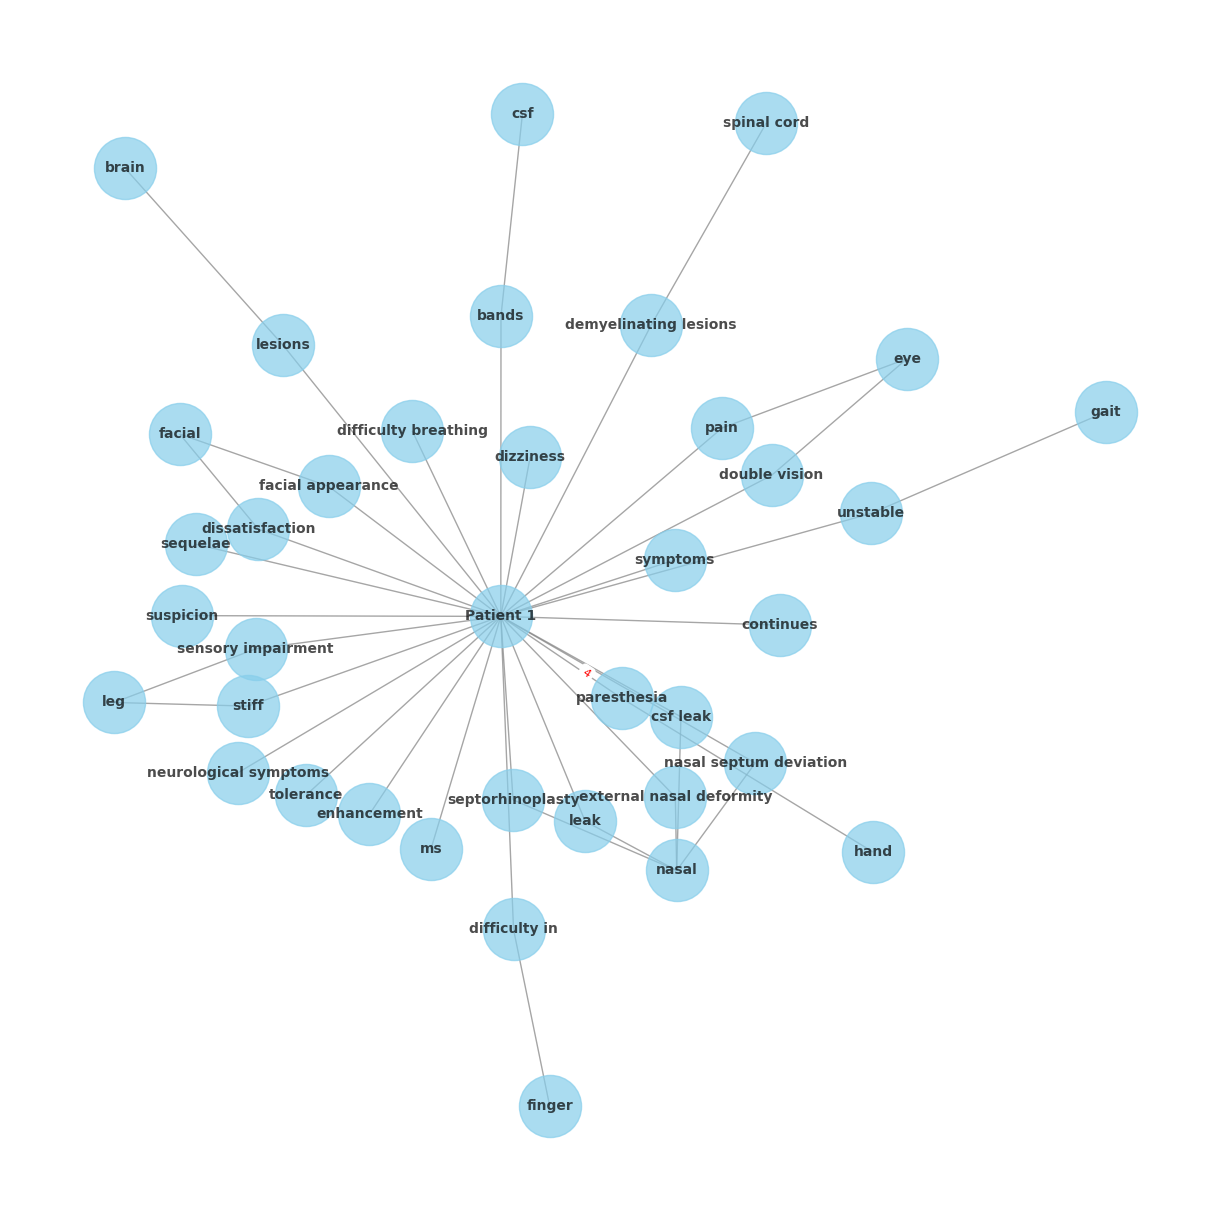

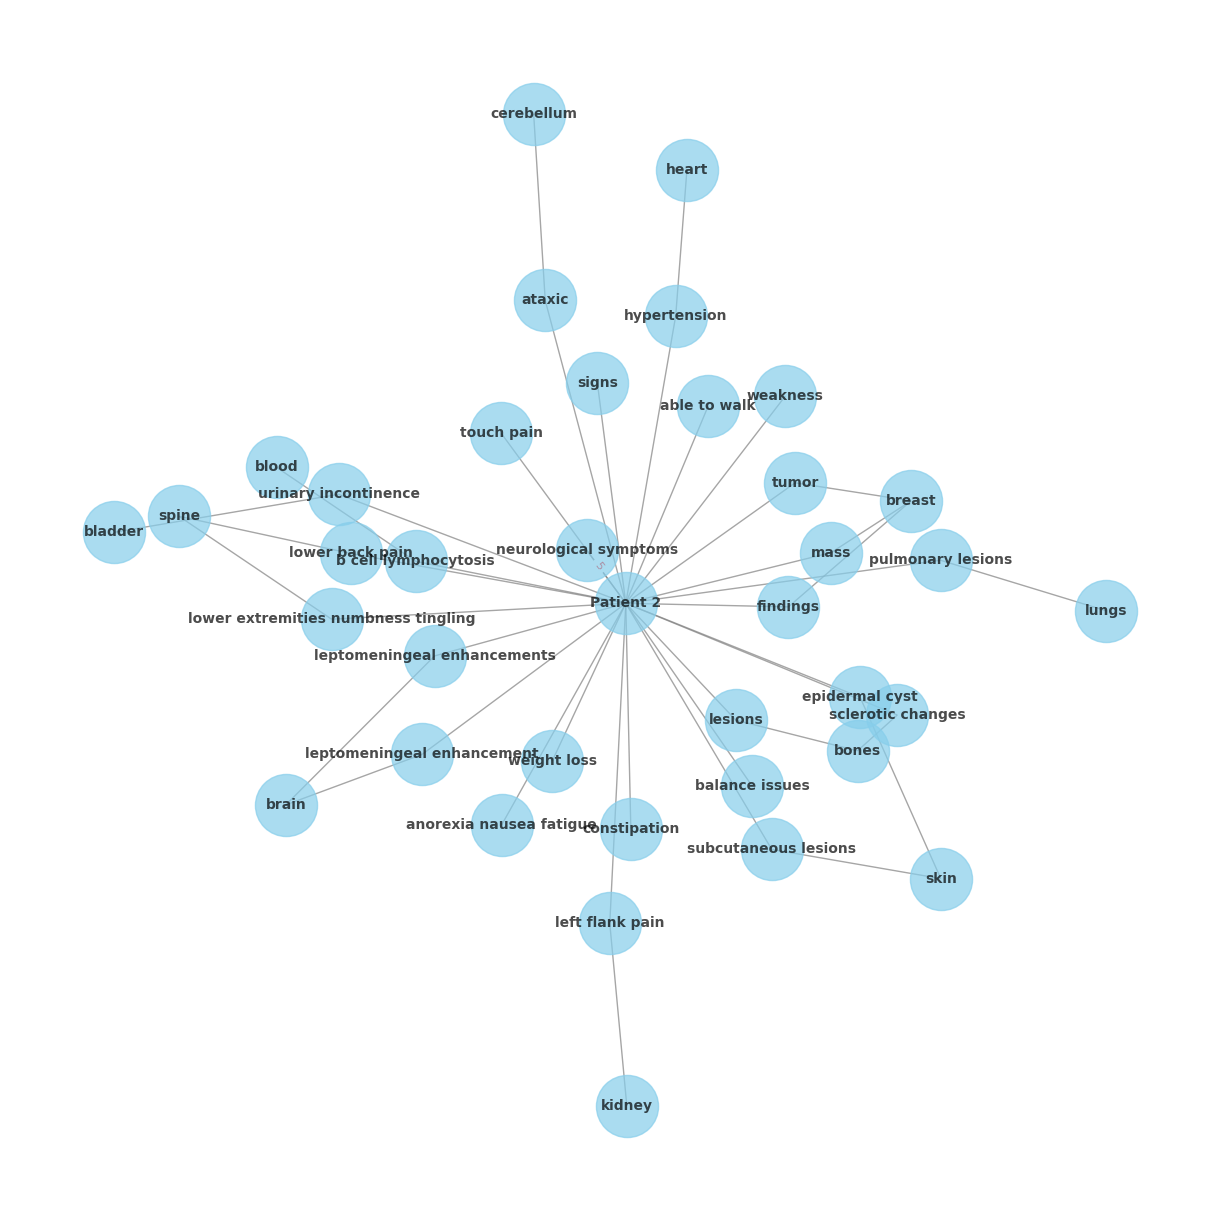

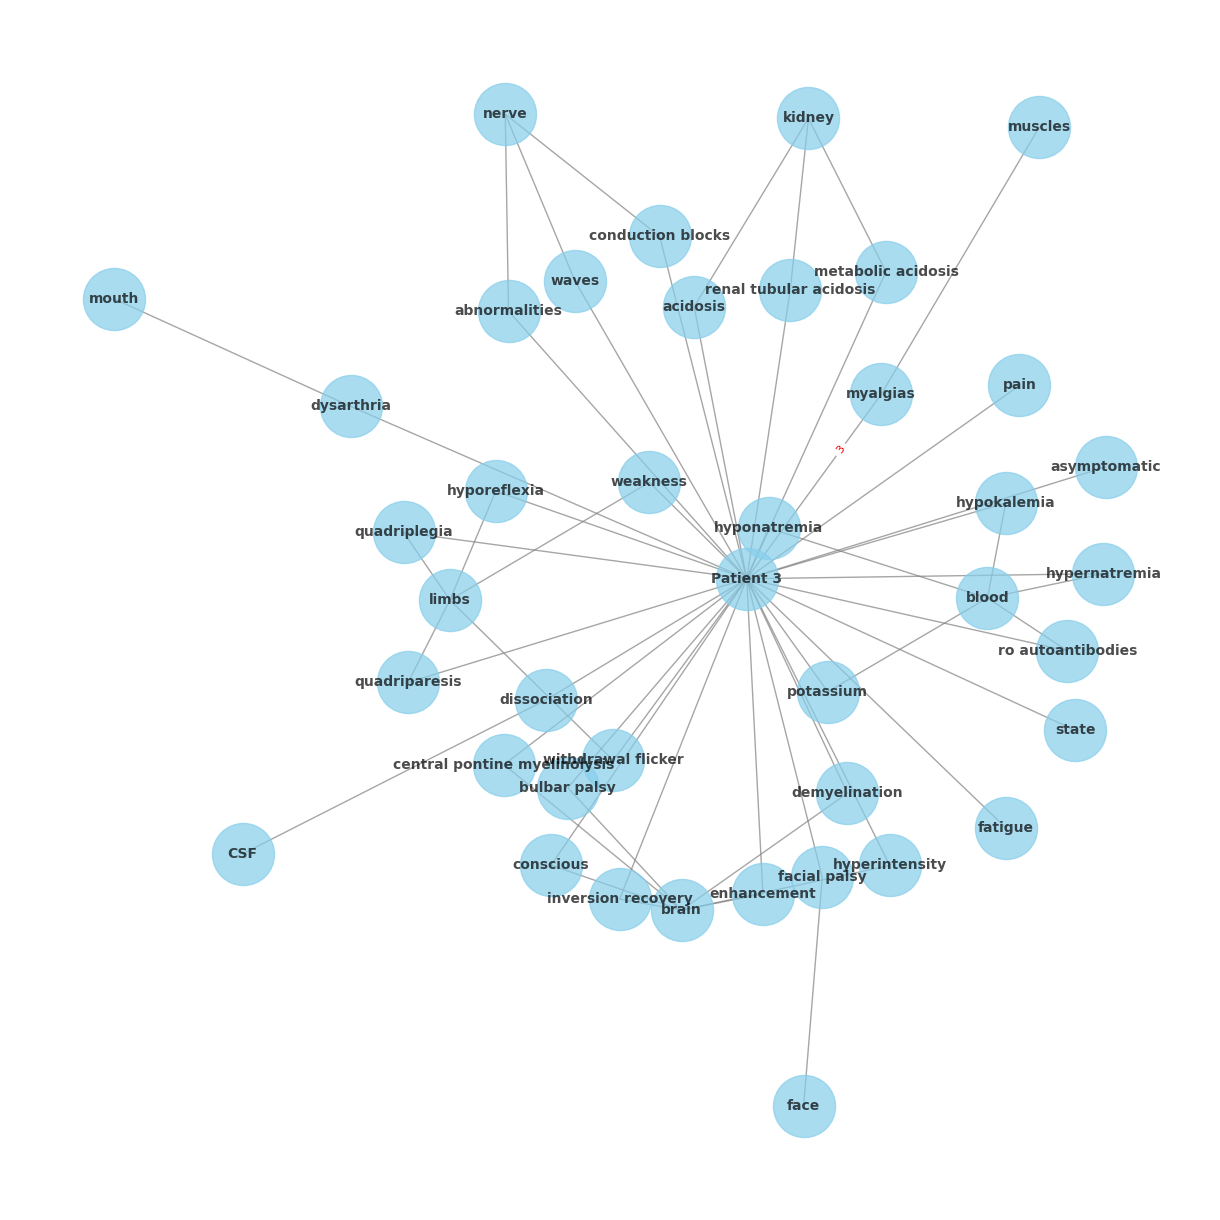

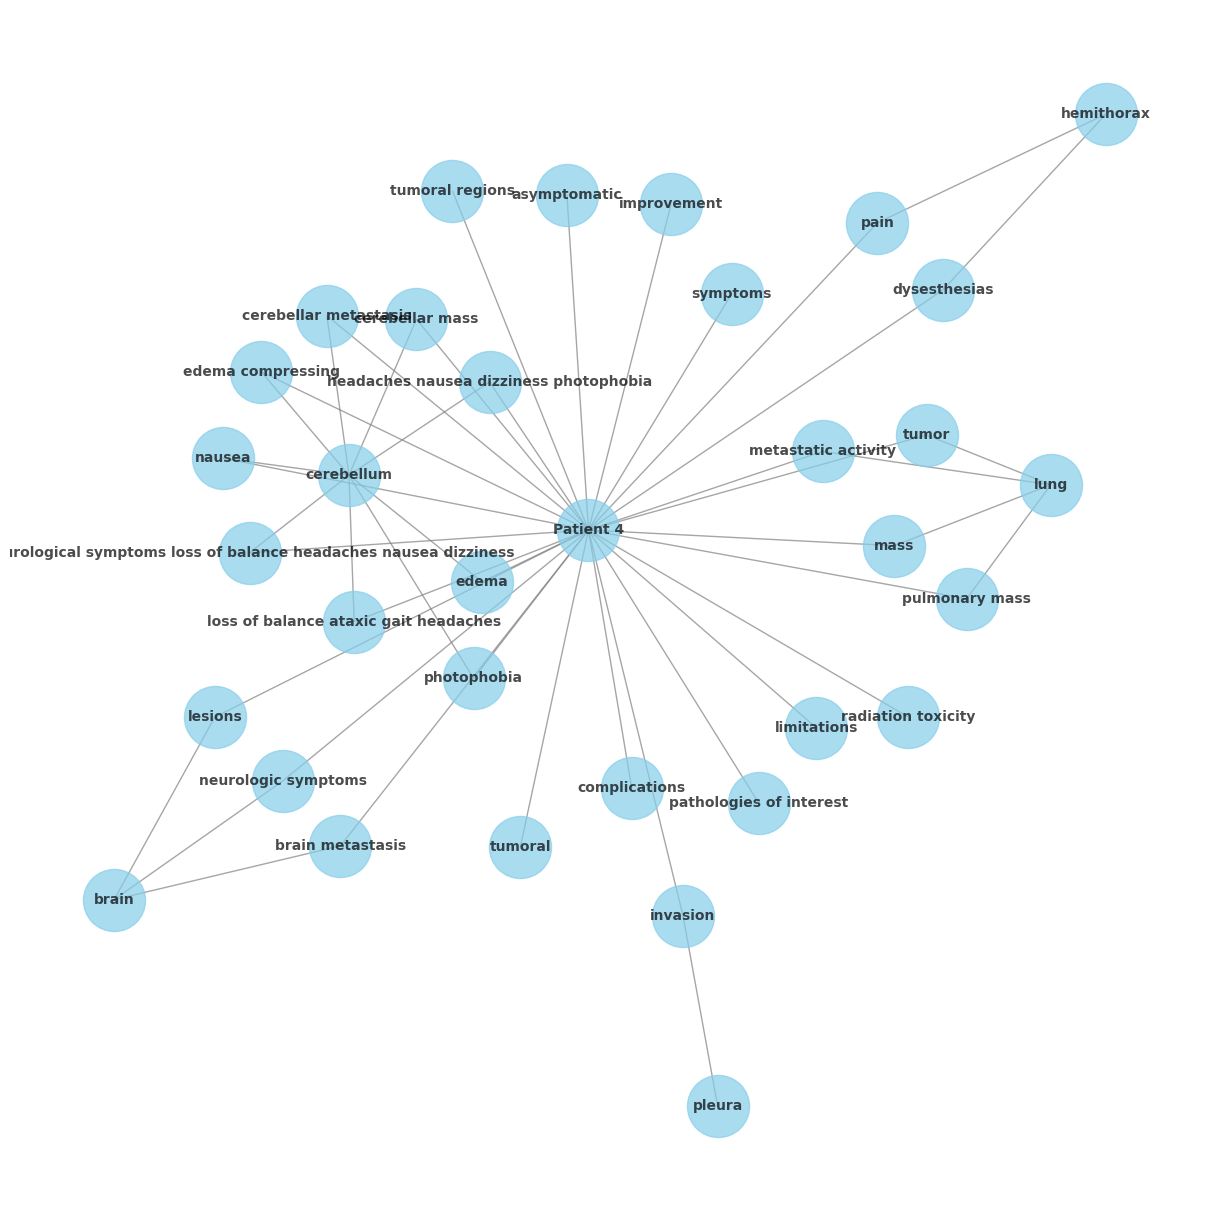

In [88]:
import networkx as nx
import matplotlib.pyplot as plt

graphs = []

for i, patient_data in enumerate(symptom_with_organ_ALL):
    # Create a new graph
    G = nx.Graph()
    
    # Add a central node for the patient
    patient_node = f'Patient {i+1}'
    G.add_node(patient_node, label='Patient')
    
    # Add nodes for symptoms and connect them to the patient node
    for item in patient_data:
        for symptom, organ in item.items():
            if organ != 'unspecified':
                G.add_node(symptom, label='Symptom')
                G.add_edge(patient_node, symptom)
                # Add nodes for organs and connect them to the symptoms
                if organ != 'unspecified':
                    G.add_node(organ, label='Organ')
                    G.add_edge(symptom, organ)
            else:
                G.add_node(symptom, label='Symptom')
                G.add_edge(patient_node, symptom)

    
    # Append the graph for the patient to the list
    graphs.append(G)

    

    # To also set edge weights, you could add weights here:
    for j in range(len(list(symptom_with_duration_ALL[i].keys()))):
        symptom = list(symptom_with_duration_ALL[i].values())[j]
        duration = list(symptom_with_duration_ALL[i].keys())[j]
        if G.has_edge(patient_node, symptom):
            G[patient_node][symptom]['weight'] = time_units.index(duration)


def plot_graph(G):
    pos = nx.spring_layout(G, k=0.5, scale=2)  # Adjust k and scale for better spacing
    labels = nx.get_edge_attributes(G, 'label')
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(12, 12))  # Adjust figure size for better display
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', alpha=0.7, edge_color='gray')
    
    # Separate drawing of edge labels and weights to avoid overlap
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_color='red', font_size=8, label_pos=0.3)  # Adjust label_pos for better placement

    plt.show()

# Plot each graph in the list
for G in graphs:
    plot_graph(G)


In [89]:
print(graphs[0])

Graph with 38 nodes and 44 edges


In [90]:
from transformers import BertTokenizer, BertModel, BertConfig
import torch

# Load the tokenizer and model
config_path  = r"C:\Users\Prashant Ronad\Documents\HPCC codes 1\Healthcare\Bio-Bert\config.json"
vocab_path = r"C:\Users\Prashant Ronad\Documents\HPCC codes 1\Healthcare\Bio-Bert\vocab.txt"
model_path = r"C:\Users\Prashant Ronad\Documents\HPCC codes 1\Healthcare\Bio-Bert\pytorch_model.bin"
config = BertConfig.from_pretrained(config_path)
tokenizer = BertTokenizer.from_pretrained(vocab_path)
model = BertModel.from_pretrained(model_path, config=config, local_files_only=True)

# Define your text
text = "Patient 1"

# Tokenize the input text
inputs = tokenizer(text, return_tensors='pt')

# Get the embeddings
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state

# Find the index of the 'heart' token
token_index = (inputs['input_ids'] == tokenizer.convert_tokens_to_ids('patient')).nonzero(as_tuple=True)[1].item()

# Extract the embedding for the 'heart' token
heart_embedding = embeddings[0, token_index]

# Print the shape and the embedding
print(heart_embedding.shape)
print(heart_embedding)


c:\Users\Prashant Ronad\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1929: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


torch.Size([768])
tensor([ 3.3148e-01,  1.4634e-01,  1.8599e-01, -1.0697e-01,  2.0451e-01,
         2.0819e-01,  6.4766e-02, -2.8521e-02, -1.0944e-01, -3.9949e-02,
        -2.0606e-03,  3.8082e-01,  4.3468e-01,  4.5404e-02, -2.7789e-01,
         4.3598e-02,  2.1221e-01,  2.4464e-01, -1.9306e-01, -3.6752e-01,
        -2.6261e-01, -7.7560e-01,  2.1232e-02,  1.1886e-02,  3.2327e-01,
        -1.3088e-02,  5.6086e-01, -8.4705e-02, -4.3772e-01,  1.1679e-01,
        -2.6034e-02,  4.7273e-01,  2.0680e-01,  1.2968e-01, -3.4953e-01,
         1.9528e-01,  1.5376e-01, -2.4787e-02, -2.6667e-02,  3.7897e-01,
         1.6857e-01, -3.7239e-02,  6.9188e-02, -4.8350e-01, -3.2077e-01,
        -6.3226e-01, -1.6122e-01, -1.2784e-01, -4.2166e-01,  8.1064e-02,
         8.1417e-01,  6.4326e-02,  3.3122e-01, -5.3099e-02, -1.6762e-02,
        -3.0145e-01,  5.2275e-01, -1.2564e-01, -3.8426e-01,  5.3775e-01,
        -3.0149e-01,  3.4781e-01, -1.1021e-01,  1.8717e-01, -4.2361e-02,
         1.7143e-01, -1.6621e-01,

In [91]:
from transformers import BertTokenizer, BertModel, BertConfig
import torch
import numpy as np

# Load the tokenizer and model
config_path  = r"C:\Users\Prashant Ronad\Documents\HPCC codes 1\Healthcare\Bio-Bert\config.json"
vocab_path = r"C:\Users\Prashant Ronad\Documents\HPCC codes 1\Healthcare\Bio-Bert\vocab.txt"
model_path = r"C:\Users\Prashant Ronad\Documents\HPCC codes 1\Healthcare\Bio-Bert\pytorch_model.bin"
config = BertConfig.from_pretrained(config_path)
tokenizer = BertTokenizer.from_pretrained(vocab_path)
model = BertModel.from_pretrained(model_path, config=config,local_files_only=True)

feature_matrices = []
for graph in graphs:
    matrix = []
    for node in graph.nodes():
        print(node)
        text = node  # => ['<start>','in','<end>']
        inputs = tokenizer(text, return_tensors='pt')
        print(inputs)
        with torch.no_grad():
            outputs = model(**inputs)
            embeddings = outputs.last_hidden_state

        #embeddings = embeddings.numpy()
        print(embeddings.shape)
        print(embeddings[0])
        
        
        
        
        
        averaged_matrix = embeddings[0].mean(dim=0).view(1,-1)

        print(averaged_matrix.shape)
        print(averaged_matrix)
    
        
        
        
        

        matrix.append(averaged_matrix)

    
    
    matrix = torch.cat(matrix, dim=0)  # (num_nodes, hidden_size)
    feature_matrices.append(matrix)


# print(np.array(feature_matrices))


Patient 1
{'input_ids': tensor([[ 101, 5351,  122,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1]])}
torch.Size([1, 4, 768])
tensor([[ 0.4128,  0.0885, -0.1963,  ..., -0.0668,  0.1821, -0.1087],
        [ 0.3315,  0.1463,  0.1860,  ...,  0.2074,  0.1733, -0.0766],
        [-0.1540, -0.0273, -0.0336,  ..., -0.0031,  0.0495, -0.0322],
        [ 0.6172, -0.3197, -0.9631,  ..., -0.4201,  0.4606, -0.3676]])
torch.Size([1, 768])
tensor([[ 3.0186e-01, -2.8026e-02, -2.5175e-01, -2.9478e-02, -2.5029e-01,
          5.7752e-02, -1.4964e-01, -5.2318e-02,  1.2147e-01, -2.8136e-01,
         -3.7268e-01,  3.9615e-01, -3.6437e-01, -3.1009e-01, -5.4577e-01,
          4.8547e-01,  3.5709e-01,  2.4989e-01,  2.7455e-01,  1.0775e-01,
         -3.9701e-01, -6.1073e-01, -1.4044e-02, -1.2097e-01,  3.2880e-01,
          9.0970e-02,  8.1975e-01, -1.7531e-01, -4.0002e-01,  2.8327e-02,
         -2.9453e-03,  3.8257e-01, -7.4885e-02,  1.4267e-01, -4.9401e-01,
          1.

In [92]:
print(feature_matrices[0].shape)

torch.Size([38, 768])


In [128]:
main_edge_list = []
lis=[]
for G in graphs:
    matrix = []
    print(G.nodes)

    edge_list = list(G.edges())
    unique_nodes = set(node for edge in edge_list for node in edge)

    # Step 2: Create a mapping from node labels to integers
    node_mapping = {node: i for i, node in enumerate(unique_nodes)}

    numeric_edge_list = [[node_mapping[u], node_mapping[v]] for u,v in edge_list]
    lis.append(torch.tensor(numeric_edge_list))
    main_edge_list.append(edge_list)



AttributeError: 'GlobalStorage' object has no attribute 'nodes'

In [97]:
print(main_edge_list[0])
print(feature_matrices[0])
print(lis)

[('Patient 1', 'sequelae'), ('Patient 1', 'paresthesia'), ('Patient 1', 'nasal septum deviation'), ('Patient 1', 'double vision'), ('Patient 1', 'sensory impairment'), ('Patient 1', 'neurological symptoms'), ('Patient 1', 'lesions'), ('Patient 1', 'demyelinating lesions'), ('Patient 1', 'suspicion'), ('Patient 1', 'stiff'), ('Patient 1', 'continues'), ('Patient 1', 'difficulty breathing'), ('Patient 1', 'external nasal deformity'), ('Patient 1', 'difficulty in'), ('Patient 1', 'pain'), ('Patient 1', 'enhancement'), ('Patient 1', 'unstable'), ('Patient 1', 'ms'), ('Patient 1', 'facial appearance'), ('Patient 1', 'csf leak'), ('Patient 1', 'leak'), ('Patient 1', 'symptoms'), ('Patient 1', 'dissatisfaction'), ('Patient 1', 'tolerance'), ('Patient 1', 'dizziness'), ('Patient 1', 'bands'), ('Patient 1', 'septorhinoplasty'), ('paresthesia', 'hand'), ('nasal septum deviation', 'nasal'), ('nasal', 'external nasal deformity'), ('nasal', 'csf leak'), ('nasal', 'leak'), ('nasal', 'septorhinoplast

In [116]:
print(lis[0].shape)
print(feature_matrices[0].shape)

torch.Size([44, 2])
torch.Size([38, 768])


In [125]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, SortAggregation
from torch_geometric.data import Data

class GCN_SortPool_CNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, k):
        super(GCN_SortPool_CNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.sort_pool = SortAggregation(k=k)
        self.cnn1d = nn.Conv1d(in_channels=hidden_channels, out_channels=32, kernel_size=2)
        
        # Calculate the correct input size for the fully connected layer
        cnn_output_size = 32 * (k - 1)  # Because kernel_size=2 reduces length by 1
        self.fc = nn.Linear(cnn_output_size, out_channels)
        
    def forward(self, x, edge_index):
        # GCN Layers
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        
        # SortPooling
        x = self.sort_pool(x, torch.zeros(x.size(0), dtype=torch.long))  # Create a dummy batch tensor
        
        # Reshape for 1D CNN
        x = x.view(x.size(0), -1, self.sort_pool.k)  # Reshape to (batch_size, hidden_channels, k)
        
        # 1D CNN
        x = F.relu(self.cnn1d(x))
        x = x.view(x.size(0), -1)  # Flatten
        
        # Fully Connected + Sigmoid
        x = self.fc(x)
        x = torch.sigmoid(x)  # Apply sigmoid activation
        return x

# Define your model
model = GCN_SortPool_CNN(in_channels=768, hidden_channels=32, out_channels=1, k=5)  # Assuming binary classification (1 output channel)

import torch.optim as optim

# Initialize optimizer and criterion
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification

# Assuming you have lists of feature matrices and edge lists with varying node counts
n = 4 # Example number of graphs
# num_nodes = [torch.randint(20, 50, (1,)).item() for _ in range(n)]   Random number of nodes between 20 and 50
feature_matrices = feature_matrices  # List of feature matrices with varying nodes
edge_lists= lis  # List of edge lists

# Create a list of Data objects
graphs = [Data(x=feature_matrices[i], edge_index=lis[i]) for i in range(n)]

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    total_loss = 0
    i = 0
    for graph in graphs:
        optimizer.zero_grad()
        output = model(graph.x, graph.edge_index.view(2,-1))
        target = torch.tensor(pred_1[i], dtype=torch.float32).view(1,1)  # Assuming target labels for binary classification
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        i+=1
    print(f"Epoch {epoch+1}, Average Loss: {total_loss / len(graphs)}")

Epoch 1, Average Loss: 0.6465144753456116
Epoch 2, Average Loss: 0.5302271023392677
Epoch 3, Average Loss: 0.3945297375321388
Epoch 4, Average Loss: 0.24867554381489754
Epoch 5, Average Loss: 0.09879420418292284
Epoch 6, Average Loss: 0.02692194120027125
Epoch 7, Average Loss: 0.005873875314136967
Epoch 8, Average Loss: 0.001206563123560045
Epoch 9, Average Loss: 0.00034053811396006495
Epoch 10, Average Loss: 0.00012861326922575245
Epoch 11, Average Loss: 6.279009221543674e-05
Epoch 12, Average Loss: 3.752079260266328e-05
Epoch 13, Average Loss: 2.6045384402095806e-05
Epoch 14, Average Loss: 2.015232678331813e-05
Epoch 15, Average Loss: 1.662682552705519e-05
Epoch 16, Average Loss: 1.4656869211648882e-05
Epoch 17, Average Loss: 1.3417778120583534e-05
Epoch 18, Average Loss: 1.2607527878572e-05
Epoch 19, Average Loss: 1.2059664527441782e-05
Epoch 20, Average Loss: 1.1677060570036701e-05
Epoch 21, Average Loss: 1.140061817750393e-05
Epoch 22, Average Loss: 1.1193233603989938e-05
Epoch 23

In [122]:
print(97.684)

97.684
